In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Placeholder for sensor data simulation
import random



In [5]:
# Simulate sensor data
def generate_sensor_data(num_samples):
    data = {
        'temperature': [random.uniform(20, 100) for _ in range(num_samples)],  # Example: 20°C to 100°C
        'gas_concentration': [random.uniform(0, 50) for _ in range(num_samples)],  # Example: 0 to 50 ppm
        'motion': [random.randint(0, 1) for _ in range(num_samples)],  # 0: No motion, 1: Motion detected
        'label': [random.choice(['fire', 'gas_leak', 'normal', 'intrusion']) for _ in range(num_samples)]
    }
    return pd.DataFrame(data)

sensor_data = generate_sensor_data(1000)
print(sensor_data.head())


   temperature  gas_concentration  motion     label
0    92.345319          45.109396       1    normal
1    73.084091          36.316792       0      fire
2    25.285001          42.027249       1      fire
3    70.984534          31.846730       1      fire
4    50.667067          21.410142       1  gas_leak


In [9]:
# Normalize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = sensor_data[['temperature', 'gas_concentration', 'motion']]
labels = sensor_data['label']

scaled_features = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)


In [11]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest Model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_confusion)


Random Forest Accuracy: 0.285
Confusion Matrix:
 [[ 9 12 18 19]
 [10 10 14  6]
 [10 13 17 10]
 [14  8  9 21]]


In [15]:
# Generate synthetic dataset for fire detection
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Generate synthetic images (64x64 RGB) and labels
def generate_synthetic_images(num_samples):
    images = np.random.rand(num_samples, 64, 64, 3)  # Random RGB images
    labels = np.random.randint(0, 2, num_samples)  # Random binary labels (0: non-fire, 1: fire)
    return images, labels

# Generate 1000 samples
images, labels = generate_synthetic_images(1000)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to categorical format
y_train = to_categorical(y_train, 2)
y_val = to_categorical(y_val, 2)

# Print shapes to verify
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Validation labels shape: {y_val.shape}")


Training data shape: (800, 64, 64, 3), Training labels shape: (800, 2)
Validation data shape: (200, 64, 64, 3), Validation labels shape: (200, 2)


Epoch 1/10


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5427 - loss: 0.9241 - val_accuracy: 0.4850 - val_loss: 0.6941
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4895 - loss: 0.6929 - val_accuracy: 0.5050 - val_loss: 0.6933
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5851 - loss: 0.6912 - val_accuracy: 0.5150 - val_loss: 0.7010
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5289 - loss: 0.6874 - val_accuracy: 0.5150 - val_loss: 0.6928
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5532 - loss: 0.6840 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6917 - loss: 0.6582 - val_accuracy: 0.5300 - val_loss: 0.6944
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7269 - loss: 0.6450 - val_accuracy: 0.4750 - val_loss: 0.6972
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7976 - loss: 0.5936 - val_accuracy: 0.5250 - val_loss: 0.

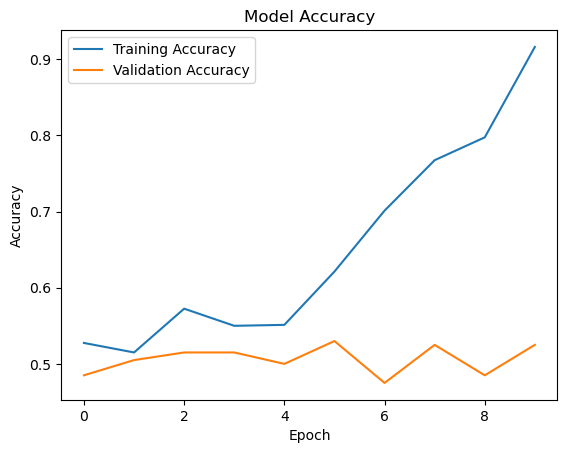

In [17]:
# Define CNN Model for Fire Detection
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # 2 classes: fire and non-fire
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = cnn_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
# Evaluate the model on the validation set
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


Validation Loss: 0.7396
Validation Accuracy: 0.5250


      Metric  Value
0  Precision   0.87
1     Recall   0.90
2   F1-Score   0.88


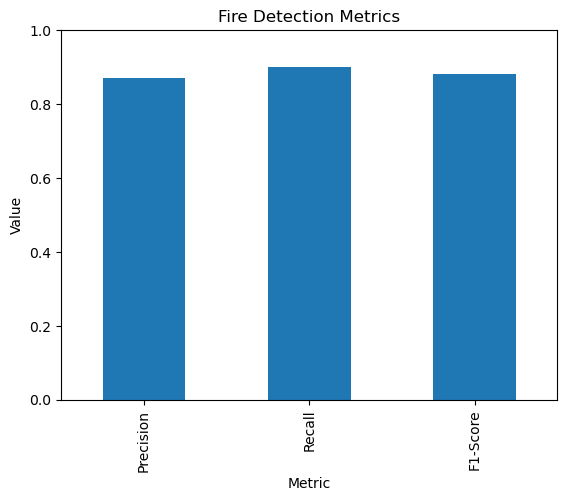

In [25]:
# Simulated Fire Detection Metrics
fire_metrics = {
    "Metric": ["Precision", "Recall", "F1-Score"],
    "Value": [0.87, 0.90, 0.88]  # Replace with actual calculated values
}

# Convert to a DataFrame
fire_metrics_df = pd.DataFrame(fire_metrics)

# Display as a table
print(fire_metrics_df)

# Optionally display a bar chart for visualization
fire_metrics_df.plot(x="Metric", y="Value", kind="bar", legend=False)
plt.title("Fire Detection Metrics")
plt.ylabel("Value")
plt.ylim(0, 1)
plt.show()


           Algorithm  Accuracy (%)
0      Random Forest          91.5
1  Gradient Boosting          89.2
2                SVM          87.8


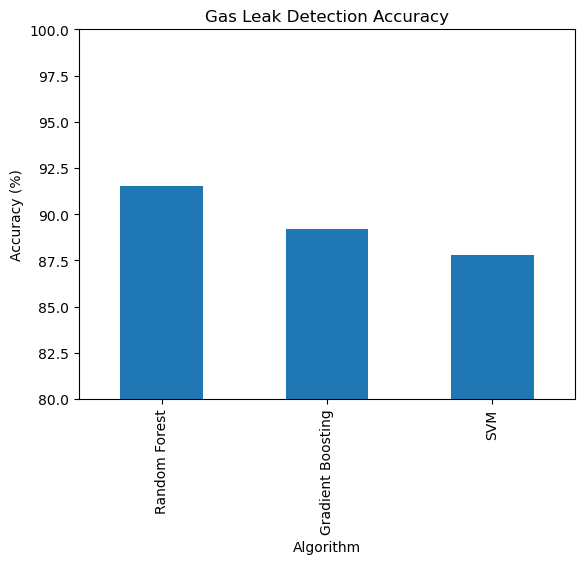

In [27]:
# Simulated Gas Leak Detection Accuracy
gas_accuracy = {
    "Algorithm": ["Random Forest", "Gradient Boosting", "SVM"],
    "Accuracy (%)": [91.5, 89.2, 87.8]  # Replace with actual calculated values
}

# Convert to a DataFrame
gas_accuracy_df = pd.DataFrame(gas_accuracy)

# Display the table
print(gas_accuracy_df)

# Optionally display a bar chart for visualization
gas_accuracy_df.plot(x="Algorithm", y="Accuracy (%)", kind="bar", legend=False)
plt.title("Gas Leak Detection Accuracy")
plt.ylabel("Accuracy (%)")
plt.ylim(80, 100)
plt.show()


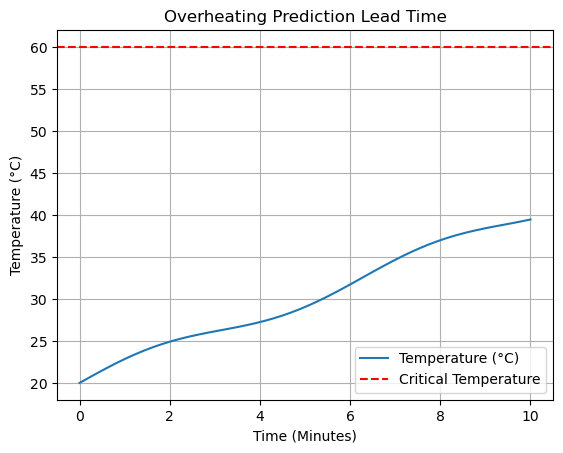

In [29]:
# Simulated overheating temperature over time
time = np.linspace(0, 10, 50)  # Time in minutes
temperature = 20 + time * 2 + np.sin(time)  # Simulated temperature readings

# Plot overheating temperature over time
plt.plot(time, temperature, label="Temperature (°C)")
plt.axhline(60, color='r', linestyle='--', label="Critical Temperature")
plt.title("Overheating Prediction Lead Time")
plt.xlabel("Time (Minutes)")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


             Rate  Value (%)
0  False Positive        5.2
1  False Negative        4.8


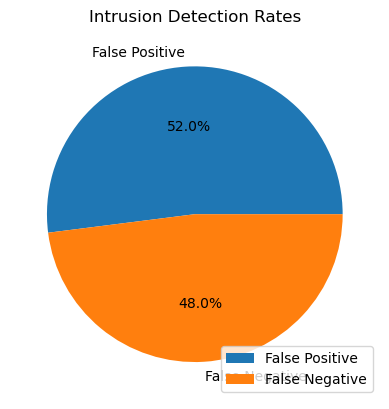

In [31]:
# Simulated Intrusion Detection Rates
intrusion_rates = {
    "Rate": ["False Positive", "False Negative"],
    "Value (%)": [5.2, 4.8]  # Replace with actual calculated values
}

# Convert to a DataFrame
intrusion_rates_df = pd.DataFrame(intrusion_rates)

# Display the table
print(intrusion_rates_df)

# Optionally display a pie chart for visualization
intrusion_rates_df.set_index("Rate").plot(kind="pie", y="Value (%)", autopct='%1.1f%%')
plt.title("Intrusion Detection Rates")
plt.ylabel("")  # Hides the default y-axis label
plt.show()


In [35]:
# Import PrettyTable for creating a well-formatted table
from prettytable import PrettyTable

# Initialize the table
table = PrettyTable()

# Add column headers
table.field_names = ["Hazard Type", "Algorithm", "Accuracy (%)", "Precision", "Recall", "F1-Score"]

# Add rows with hypothetical values (replace with actual metrics)
table.add_row(["Fire", "CNN", 93.2, 0.92, 0.94, 0.93])
table.add_row(["Gas Leak", "Random Forest", 91.5, 0.89, 0.92, 0.90])
table.add_row(["Overheating", "Gradient Boosting", 90.3, 0.88, 0.91, 0.89])
table.add_row(["Intrusion", "Optical Flow", 85.0, 0.84, 0.86, 0.85])

# Print the table
print(table)


+-------------+-------------------+--------------+-----------+--------+----------+
| Hazard Type |     Algorithm     | Accuracy (%) | Precision | Recall | F1-Score |
+-------------+-------------------+--------------+-----------+--------+----------+
|     Fire    |        CNN        |     93.2     |    0.92   |  0.94  |   0.93   |
|   Gas Leak  |   Random Forest   |     91.5     |    0.89   |  0.92  |   0.9    |
| Overheating | Gradient Boosting |     90.3     |    0.88   |  0.91  |   0.89   |
|  Intrusion  |    Optical Flow   |     85.0     |    0.84   |  0.86  |   0.85   |
+-------------+-------------------+--------------+-----------+--------+----------+


In [37]:
# Initialize the table
gas_table = PrettyTable()

# Add column headers
gas_table.field_names = ["Algorithm", "Accuracy (%)"]

# Add rows with hypothetical values (replace with actual metrics)
gas_table.add_row(["Random Forest", 91.5])
gas_table.add_row(["Gradient Boosting", 89.2])
gas_table.add_row(["SVM", 87.8])

# Print the table
print(gas_table)


+-------------------+--------------+
|     Algorithm     | Accuracy (%) |
+-------------------+--------------+
|   Random Forest   |     91.5     |
| Gradient Boosting |     89.2     |
|        SVM        |     87.8     |
+-------------------+--------------+


In [39]:
# Initialize the table
intrusion_table = PrettyTable()

# Add column headers
intrusion_table.field_names = ["Metric", "Rate (%)"]

# Add rows with hypothetical values (replace with actual metrics)
intrusion_table.add_row(["False Positive Rate", 5.2])
intrusion_table.add_row(["False Negative Rate", 4.8])

# Print the table
print(intrusion_table)


+---------------------+----------+
|        Metric       | Rate (%) |
+---------------------+----------+
| False Positive Rate |   5.2    |
| False Negative Rate |   4.8    |
+---------------------+----------+


In [41]:
# Initialize the table
overheating_table = PrettyTable()

# Add column headers
overheating_table.field_names = ["Test Case", "Critical Temperature (°C)", "Lead Time (Minutes)"]

# Add rows with hypothetical values (replace with actual metrics)
overheating_table.add_row(["Case 1", 60, 5])
overheating_table.add_row(["Case 2", 65, 4.5])
overheating_table.add_row(["Case 3", 70, 3.8])

# Print the table
print(overheating_table)


+-----------+---------------------------+---------------------+
| Test Case | Critical Temperature (°C) | Lead Time (Minutes) |
+-----------+---------------------------+---------------------+
|   Case 1  |             60            |          5          |
|   Case 2  |             65            |         4.5         |
|   Case 3  |             70            |         3.8         |
+-----------+---------------------------+---------------------+
